Estudio del *dataset* de noticias falsas:

In [19]:
# DATOS: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection ***HAY QUE CITARLO APROPIADAMENTE*** #

# Barely-True - 0
# False - 1
# Half-True - 2
# Mostly-True - 3
# Not-Known - 4
# True - 5

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [20]:
### DRIVE DATA ###
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
PATH = "/content/drive/My Drive/TFM/Data/FakeNews_Multi/"

Mounted at /content/drive


In [21]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "train.csv",  sep=',', on_bad_lines='skip')
df = df[['Text', 'Labels']]
df=df.rename(columns={"Text": "Text", "Labels": "Label"})

X = df['Text']
y = df['Label']

X_train, X_aux, y_train, y_aux = train_test_split(X, y, test_size=0.30, random_state=55, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=2/3, random_state=55, stratify=y_aux)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 7168
Tamaño conjunto de Validación: 1024
Tamaño conjunto de Evaluación: 2048


# **ESTUDIO TRAINING**

2    1480
1    1397
3    1373
5    1173
0    1158
4     587
Name: Label, dtype: int64


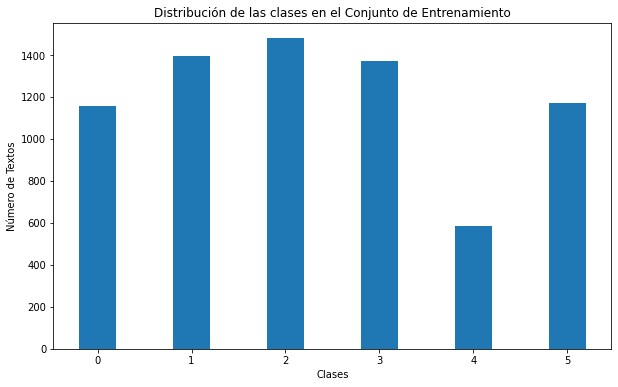

In [22]:
# Análisis de Distribución #
counts = y_train.value_counts()
print(counts)

counts_train = y_train.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [23]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(text.split()))
Train_len.describe()

count    7168.000000
mean       18.013532
std         8.587241
min         2.000000
25%        12.000000
50%        17.000000
75%        22.000000
max       309.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

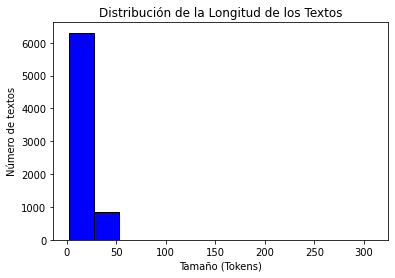

In [24]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

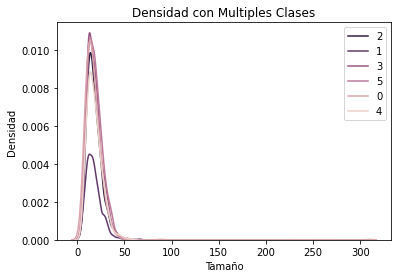

In [25]:
# Densidad de Clases #
Densidad = pd.DataFrame({'Length': Train_len, 'Label': y_train})
sns.kdeplot(data=Densidad, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO VALIDACIÓN**

2    211
1    199
3    196
5    168
0    166
4     84
Name: Label, dtype: int64


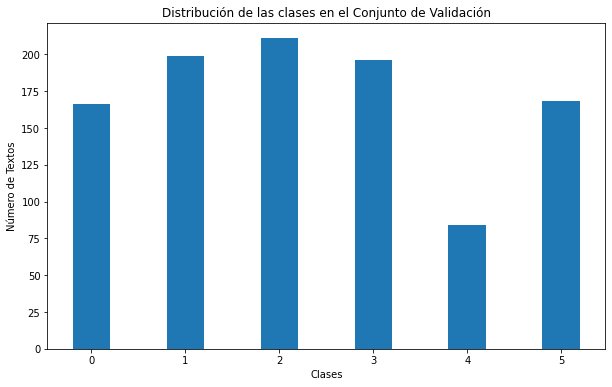

In [26]:
# Análisis de Distribución #
counts = y_val.value_counts()
print(counts)

counts_val = y_val.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [27]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(text.split()))
Val_len.describe()

count    1024.000000
mean       18.106445
std        15.821320
min         2.000000
25%        12.000000
50%        17.000000
75%        22.000000
max       467.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

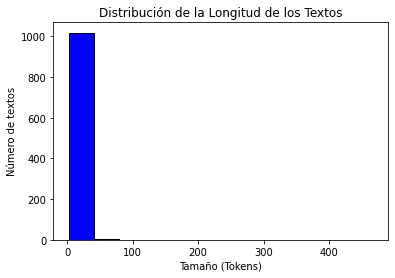

In [28]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

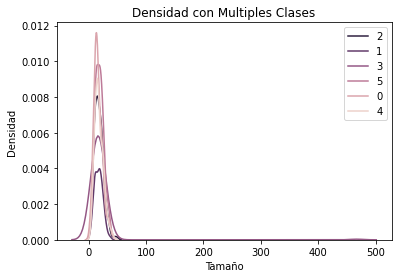

In [29]:
# Densidad de Clases #
Densidad2 = pd.DataFrame({'Length': Val_len, 'Label': y_val})
sns.kdeplot(data=Densidad2, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO TEST**

2    423
1    399
3    393
5    335
0    330
4    168
Name: Label, dtype: int64


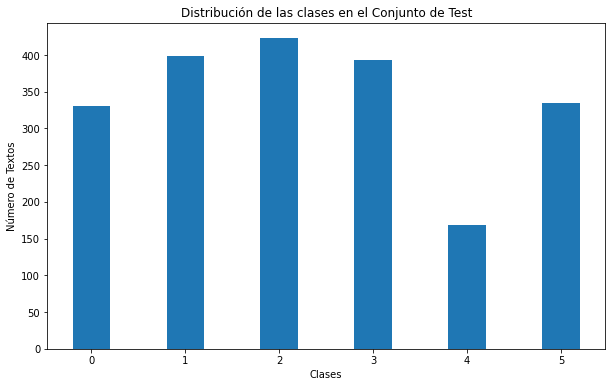

In [30]:
# Análisis de Distribución #
counts = y_test.value_counts()
print(counts)

counts_test = y_test.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [31]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(text.split()))
Test_len.describe()

count    2048.000000
mean       17.949707
std         9.128829
min         2.000000
25%        12.000000
50%        17.000000
75%        22.000000
max       235.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

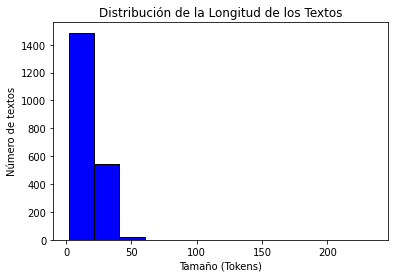

In [32]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

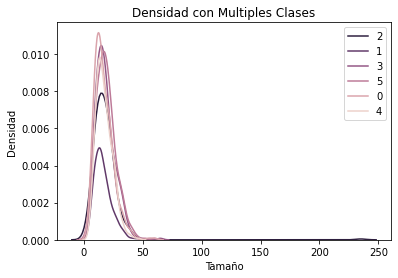

In [33]:
# Densidad de Clases #
Densidad3 = pd.DataFrame({'Length': Test_len, 'Label': y_test})
sns.kdeplot(data=Densidad3, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')